(420, 1)
(420, 300, 6)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 298, 20)           380       
_________________________________________________________________
activation (Activation)      (None, 298, 20)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 149, 20)           0         
_________________________________________________________________
dropout (Dropout)            (None, 149, 20)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 148, 30)           1230      
_________________________________________________________________
activation_1 (Activation)    (None, 148, 30)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (Non

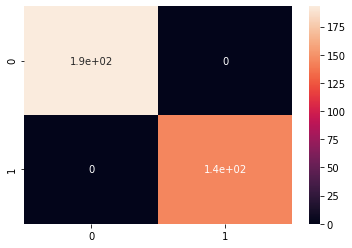

In [1]:
# Importing all the required libraries for the Deep Learning
# Keras is being for implementing the CNN
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import h5py
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn import preprocessing
#Reading the H5 file
filename = "C:/Users/Srikanth rao/Desktop/mixed_explosives_dataset/sensors_data_augmented.h5"
h5f = h5py.File(filename,'r')
sensors_data = h5f['dataset_1'][:]
h5f.close()
#The H5 file contains also the information of a temperature sensor, that you can discard
sensors_data_final = sensors_data[:,[1,2,3,4,5,6],:]#Not using temperature 
with open('C:/Users/Srikanth rao/Desktop/mixed_explosives_dataset/binary_labels_augmented.txt') as f:
    lines = f.readlines()
X = sensors_data_final #DATA
y = lines #LABEL
# Transforming the labels to numeric form using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
# Transforming the labels to numpy array
y = np.array(y)
# Reshaping the labels file
y = np.reshape(y,(420, 1))
print(y.shape)
# Splitting the labels into train and test
y_train = y[:337,:]
y_test = y[:337,:]
# Reshaping the data file
X = np.reshape(X,(420, 300, 6))
print(X.shape)
# Splitting the data into train and test
X_train = X[:337,:]
X_test = X[:337,:]
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
# Building the architecture of the CNN model
model = Sequential()
# Layer 1
model.add(Conv1D(filters=20, kernel_size=3,kernel_regularizer=l2(0.005), input_shape=(n_timesteps,n_features)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))
# Layer 2
model.add(Conv1D(filters=30, kernel_size=2,kernel_regularizer=l2(0.005)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))
#Dense and Flatten Layers
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(84, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(n_outputs, activation='sigmoid'))
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.0004,decay=0.0000001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
# Training the model with batch size 50 for 100 epochs
# Training the model on train data and validating on the test data
hist = model.fit(X_train,
                 y_train,
                 batch_size = 50,
                 epochs=500,
                 validation_data=(X_test, y_test),
                 shuffle = True,
                 callbacks = [ModelCheckpoint("model.hdf5",
                              monitor = 'val_accuracy',
                              save_best_only = True,
                              save_weights_only = False,
                              save_freq= 'epoch')])
from keras.models import load_model
model.load_weights('model.hdf5')
model.evaluate(X_test, y_test)
from sklearn.metrics import confusion_matrix,classification_report
y_pred=[]
model.load_weights('model.hdf5')
Y_pred = model.predict(X_test)
for elt in Y_pred:
  if elt < 0.5 : 
    y_pred.append(0)
  else:
    y_pred.append(1)
# Plotting the confution matrix
print('Confusion Matrix')
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
print(sns.heatmap(cm, annot=True))
# Printing the evaluation scores of the model
print('Classification Report')
class_labels = y_test 
report = classification_report(y_test, y_pred)
print(report) 

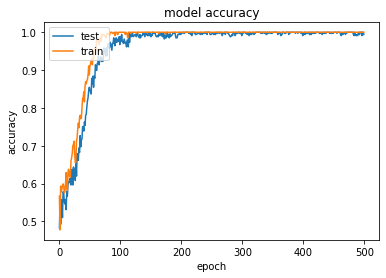

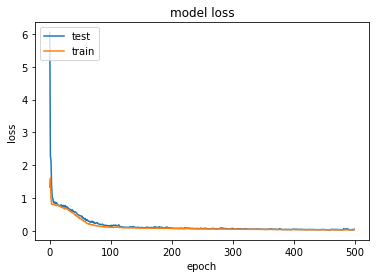

In [2]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper left')
plt.show()